[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


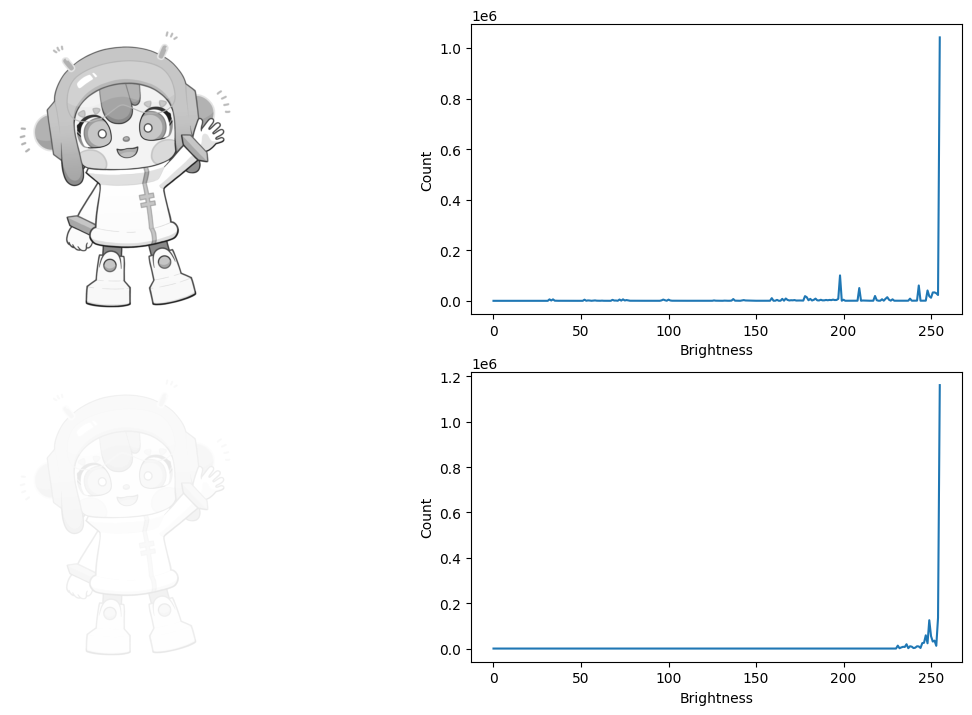

True

In [1]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("picody_gray.png", cv2.IMREAD_GRAYSCALE)

print(image)

histogram1 = cv2.calcHist([image], [0], None, [256], [0, 256])

lower = 230
upper = 255
result = cv2.normalize(image, None, alpha=lower, beta=upper, norm_type=cv2.NORM_MINMAX)

histogram2 = cv2.calcHist([result], [0], None, [256], [0, 256])

plt.rcParams["figure.figsize"] = [12, 7.5]
title = (
    "cv2.normalize (alpha="
    + str(lower)
    + ", beta="
    + str(upper)
    + ", norm_type=cv2.NORM_MINMAX"
    + "): codevace.com"
)
plt.figure(title)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.10, top=0.95)
plt.subplot(221)
plt.imshow(image, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.subplot(222)
plt.plot(histogram1)
plt.xlabel("Brightness")
plt.ylabel("Count")

plt.subplot(223)
plt.imshow(result, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.subplot(224)
plt.plot(histogram2)
plt.xlabel("Brightness")
plt.ylabel("Count")
plt.show()

cv2.imwrite("picody_gray_normalized.png", result)
